In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections
import sys
import os
#import ggplot
%load_ext rpy2.ipython
from rpy2.robjects import pandas2ri
from os.path import expanduser
from sklearn.decomposition import PCA

cwd = os.getcwd()
print(cwd)
pandas2ri.activate()
sys.path.insert(0, '%s/../'%cwd)
from utilities import *
%load_ext autoreload
%autoreload 2

/home/bzr0014/git/exploit-development/data_mining/ch04


In [2]:
columns = [item.strip() for item in """
Median house value;Median income;Housing median age;Total rooms;Total bedrooms;Population;Households;Latitude;Longitude
""".split(';')]
df = pd.read_csv('../data_sets/cadata.txt', skiprows=27, delimiter=' *', header=None)
df.columns = columns

/home/bzr0014/envs/AI/lib/python3.5/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/home/bzr0014/envs/AI/lib/python3.5/site-packages/pandas/io/parsers.py:2379: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/bzr0014/envs/AI/lib/python3.5/site-packages/pandas/io/parsers.py:2381: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [3]:
df.sample(10)

,Median house value,Median income,Housing median age,Total rooms,Total bedrooms,Population,Households,Latitude,Longitude
6356,179600.0,3.9464,9.0,907.0,207.0,619.0,194.0,34.14,-117.96
715,150000.0,3.3125,43.0,500.0,110.0,273.0,120.0,37.69,-122.09
935,156300.0,3.1696,17.0,407.0,97.0,307.0,100.0,37.50,-122.04
10583,201400.0,4.8210,16.0,2617.0,506.0,1317.0,511.0,33.72,-117.80
3449,157400.0,4.2330,34.0,2657.0,515.0,1948.0,532.0,34.32,-118.43
14241,108000.0,1.3269,18.0,1645.0,430.0,1221.0,410.0,32.69,-117.09
16518,120800.0,2.1786,44.0,300.0,72.0,160.0,73.0,37.80,-121.21
20282,179100.0,2.8561,36.0,4519.0,1081.0,4818.0,1061.0,34.19,-119.18
12899,161700.0,4.0036,13.0,3033.0,540.0,1363.0,519.0,38.63,-121.34
14917,151900.0,4.6793,27.0,1710.0,282.0,1089.0,297.0,32.62,-117.04


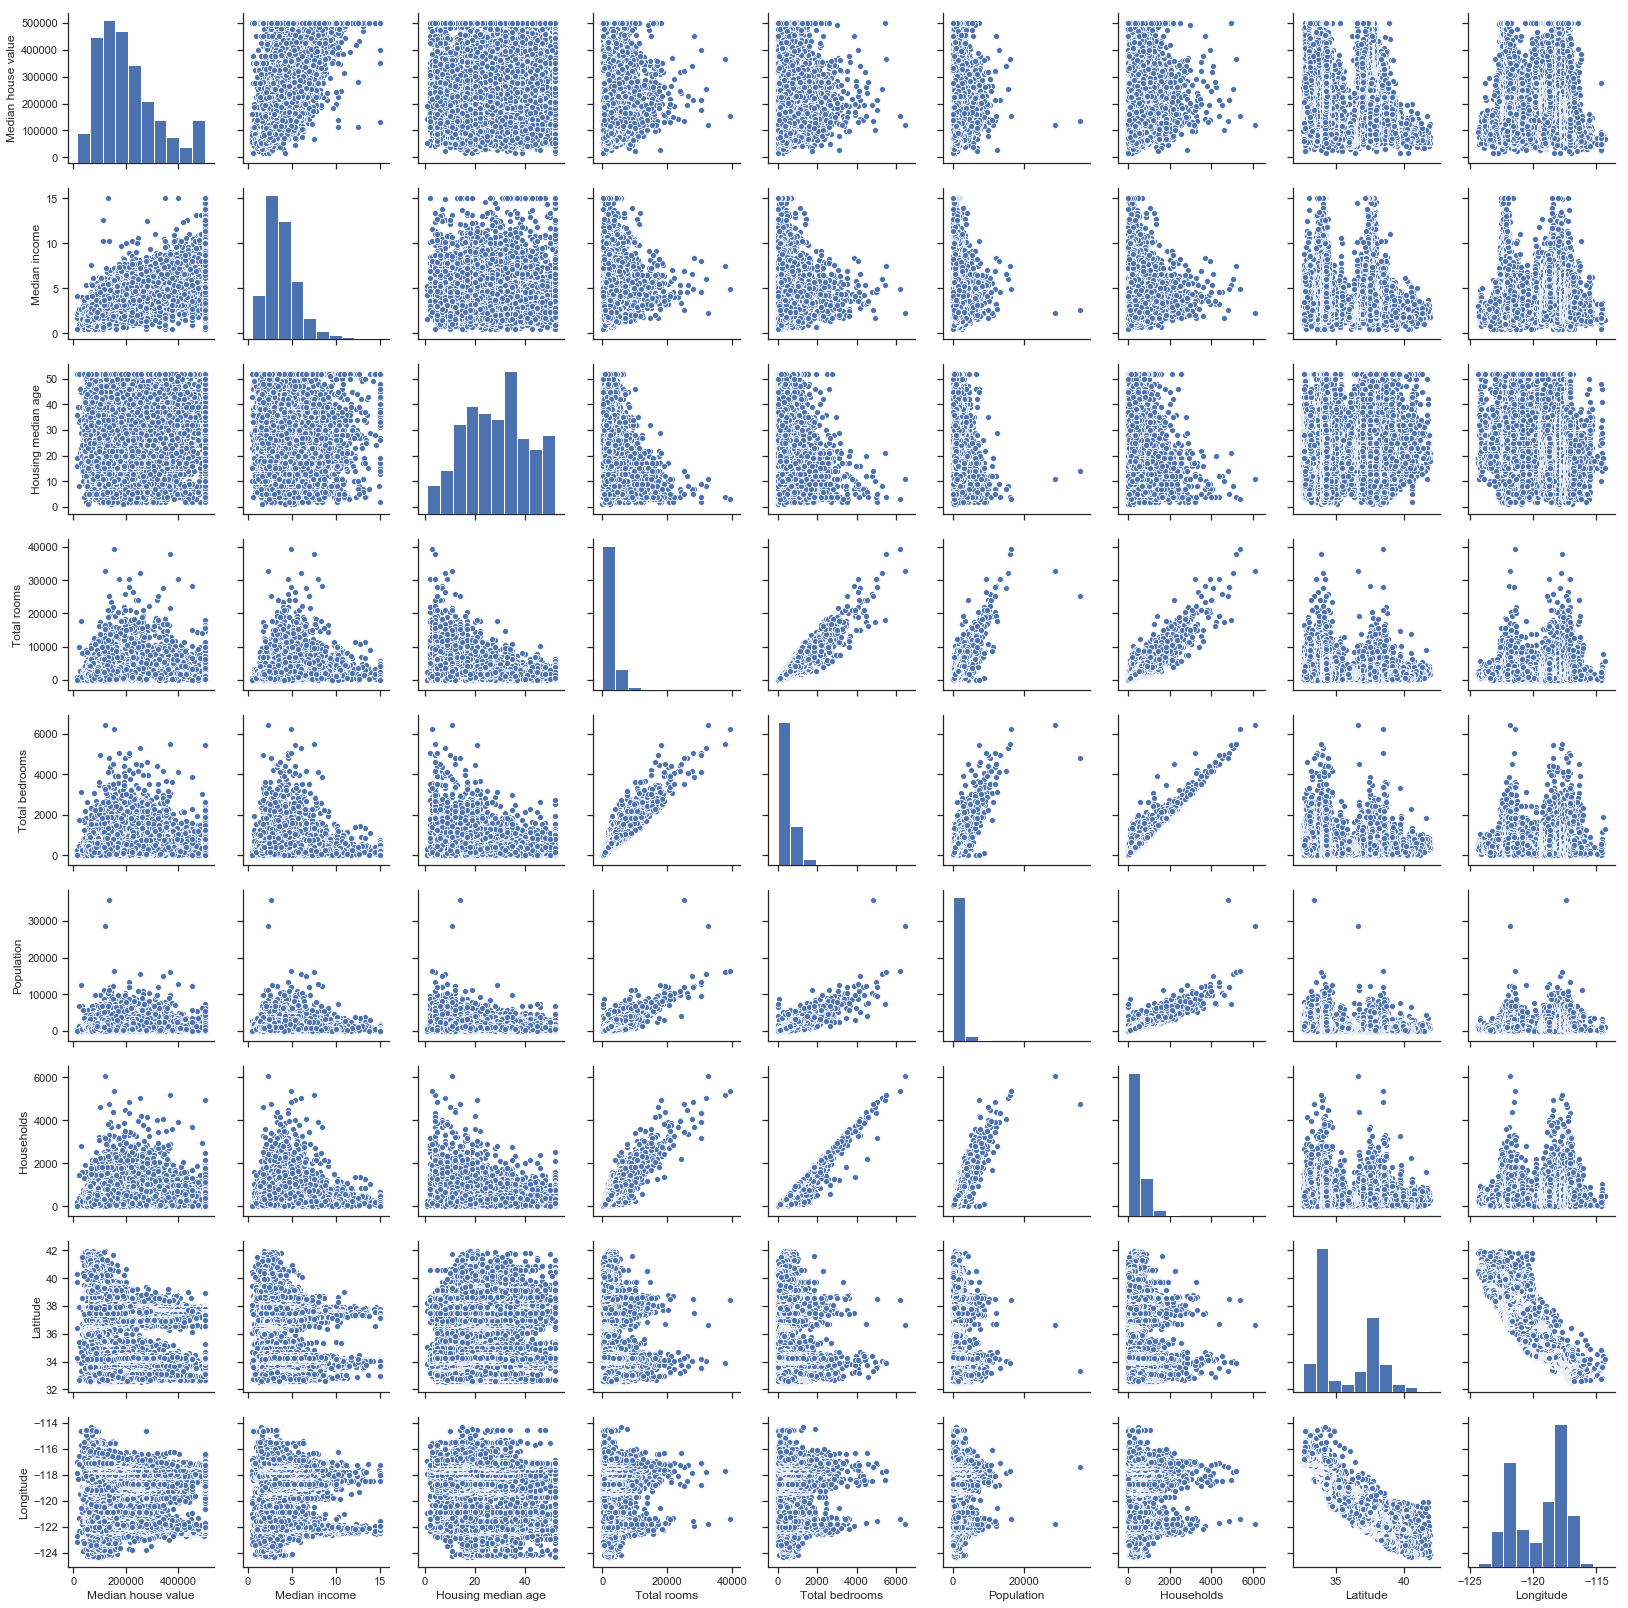

In [4]:
sns.set(style="ticks")
sns.pairplot(df)

In [4]:
dfNoResponseVariable = df[columns[1:]]
dfNoResponseVariable_z = (dfNoResponseVariable - dfNoResponseVariable.mean())/dfNoResponseVariable.std()

In [5]:
dfNoResponseVariable.corr()

,Median income,Housing median age,Total rooms,Total bedrooms,Population,Households,Latitude,Longitude
Median income,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176
Housing median age,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197
Total rooms,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568
Total bedrooms,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378
Population,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773
Households,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310
Latitude,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664
Longitude,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000


In [6]:
calculate_pvalues(dfNoResponseVariable)

,Median income,Housing median age,Total rooms,Total bedrooms,Population,Households,Latitude,Longitude
Median income,0,0,0,0.245,0.4874,0.0612,0,0.0292
Housing median age,0,0,0,0,0,0,0.1085,0
Total rooms,0,0,0,0,0,0,0,0
Total bedrooms,0.245,0,0,0,0,0,0,0
Population,0.4874,0,0,0,0,0,0,0
Households,0.0612,0,0,0,0,0,0,0
Latitude,0,0.1085,0,0,0,0,0,0
Longitude,0.0292,0,0,0,0,0,0,0


In [66]:
pca = PCA(n_components=8)

In [67]:
pca.fit(dfNoResponseVariable_z)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
x = pca.components_.T
a = pd.DataFrame(x)
a.index = ["%s_z"%column for column in columns[1:]]
a.columns = range(1, 9)
a

,1,2,3,4,5,6,7,8
Median income_z,0.045144,-0.035300,0.890917,0.407819,0.056214,0.057215,-0.168838,0.041556
Housing median age_z,-0.218499,0.016026,-0.393865,0.886341,-0.034912,-0.091479,-0.040843,0.003958
Total rooms_z,0.483771,0.074611,0.093020,0.115204,-0.317366,-0.557980,0.550480,-0.152912
Total bedrooms_z,0.490501,0.060715,-0.117157,0.063411,-0.377399,0.231004,-0.221091,0.702354
Population_z,0.471968,0.026036,-0.116248,0.082506,0.848952,-0.131099,-0.022262,0.133584
Households_z,0.491718,0.063521,-0.109440,0.096659,-0.138694,0.402963,-0.302347,-0.678107
Latitude_z,-0.073022,0.701977,0.012536,-0.098898,-0.049269,-0.464578,-0.521878,-0.036622
Longitude_z,0.075641,-0.701256,-0.055776,-0.069706,-0.100433,-0.477759,-0.503636,-0.050584


In [81]:
a = pd.DataFrame(pca.explained_variance_)
a.index = range(1, 9)
a.columns = ['Total']
a['% of Variance'] = a['Total'] / 8
a['Cumulative %'] = np.cumsum(a['% of Variance'])
a

,Total,% of Variance,Cumulative %
1,3.906682,0.488335,0.488335
2,1.907947,0.238493,0.726829
3,1.071961,0.133995,0.860824
4,0.821999,0.102750,0.963574
5,0.148055,0.018507,0.982081
6,0.081664,0.010208,0.992289
7,0.046900,0.005862,0.998151
8,0.014792,0.001849,1.000000


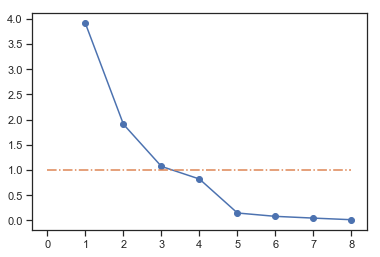

In [95]:
y = a['Total']
x = np.arange(len(y))+1
plt.scatter(x, y)
plt.plot(x, y)
plt.plot([0, 8], [1, 1], linestyle='-.')